In [1]:
import numpy as np
import matplotlib.pyplot as plt

The following cell does 3 things:

1. Sets up a sine in the time domain with two cycles, with 10 points per cycle, then pads with zeros out to a time of 5

2. Takes the FT of the signal

3. Calculates the FT of the boxcar function you effectively multiply your sinusoid by.  This function is: 
 
 $  f(t) = \begin{cases}
        1& |t|<\tau\\
        0&|t|>\tau
    \end{cases}$,
    
 which has the FT:     
    
$F(f)=\tau \rm{sinc}(f\tau) = \frac{1}{\pi f} \sin(\pi f\tau)$
    
The FT of the sine function $sin(2 \pi f_0)$ is just:

$F(f)=\frac{i}{2} (\delta(f+f_0) - \delta(f-f_0)$

so since you multiply the sine and the boxcar in the time domain, you convolve their FTs in the frequency domain.  Since the sine function has a spike as its FT, convolution just shifts the function to the location of the spike.  

So the peak gets wider as you go to higher frequencies because the $sinc$ function has a zero when $f=1/\tau$, this happens at higher frequencies for smaller $\tau$.  The higher the frequency ($f_0$) of your initial signal, the lower is $\tau$ because you start padding at shorter times.  Thus the higher the frequency, the wider the $sinc$ function that you convolve with.


(0.0, 10.0)

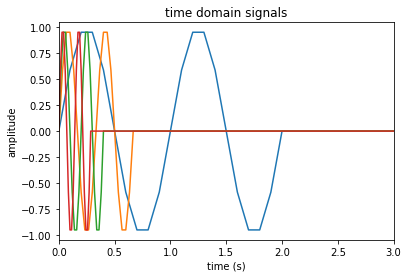

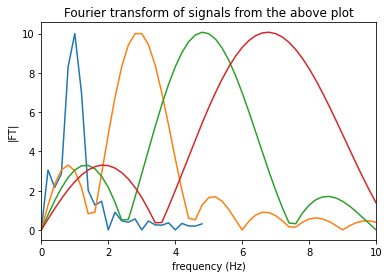

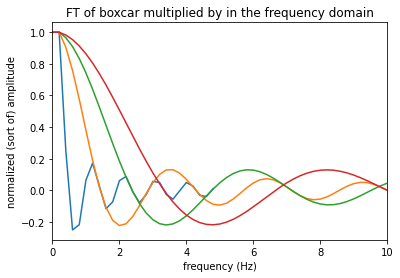

In [53]:
dt=0.01
tmax=5.0

fvec=[1.0,3.0,5.0,7.0]

plt.figure()
ax_time=plt.gca()
plt.figure()
ax_freq=plt.gca()
plt.figure()
ax_sinc=plt.gca()

for f0 in fvec:
    period=1.0/f0

    dt=period/10.

    tpad=2*period+dt
    t1=np.arange(0,tpad,dt)
    nt1=np.size(t1)
    t_total=np.arange(0,tmax,dt)
    nt_total=np.size(t_total)
    x=np.zeros_like(t_total)
    x1=np.sin(2.0*f0*np.pi*t1)
    x[0:nt1]=x1

    xf=np.fft.fftshift(np.fft.fft(x))
    f=np.fft.fftshift(np.fft.fftfreq(nt_total,d=dt))
    cutval=np.argmin(np.abs(f))  #remove f=0 so that the sinc doesn't generate errors
    f_for_sinc=np.concatenate((f[0:cutval],f[cutval+1:]))
    
    sincfunc=1/np.pi/f_for_sinc*np.sin(tpad*np.pi*f_for_sinc)

    plt.sca(ax_time)
    plt.plot(t_total,x)

    plt.sca(ax_sinc)
    
    plt.plot(f_for_sinc,sincfunc/np.max(np.abs(sincfunc)))
    #plt.plot([1/tpad,1/tpad],[0,1])


    plt.sca(ax_freq)
    plt.plot(f,np.abs(xf))
plt.sca(ax_time)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('time domain signals')
plt.xlim([0,3])

plt.sca(ax_freq)
plt.xlabel('frequency (Hz)')
plt.ylabel('|FT|')
plt.title('Fourier transform of signals from the above plot')
plt.xlim([0,10])

plt.sca(ax_sinc)
plt.xlabel('frequency (Hz)')
plt.ylabel('normalized (sort of) amplitude')
plt.title('FT of boxcar multiplied by in the frequency domain')
plt.xlim([0,10])



In [49]:
np.concatenate((f[0:10],f[12:20]))

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -2.6,
       -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2])